Prepare Data

In [20]:
import pandas as pd

# Load labeled dataset
file_path = 'labeled_student_data_s.csv'  # Update with the correct path
df = pd.read_csv(file_path)

df = df[df['Interest Label'] != 'Exploring']

# Define feature columns (marks in subjects)
subject_cols = ['Operating System', 'DSA', 'Frontend', 'Backend', 'Machine Learning', 'Data Analytics']

# Define target column (Interest Label)
target_col = 'Interest Label'

# Separate features (X) and target (y)
X = df[subject_cols]
y = df[target_col]

# Display first few rows
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   Operating System  DSA  Frontend  Backend  Machine Learning  Data Analytics
0                99   32        33       80                12              92
1                 7   21        39       54                20              39
2                51   23        85        8                17              93
3                73   80        79       25                17              47
4                30    6        86       55                91              85

Target (y):
0            Robotics
1     Web Development
2            Robotics
3    Game Development
4    Machine Learning
Name: Interest Label, dtype: object


Split Data

In [21]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shape of the datasets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (6920, 6)
Testing set size: (2967, 6)


Train a Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
model = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.3919784293899562


c:\Users\simran dhillon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train & Evaluate a Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.38860802157061003

Classification Report:
                   precision    recall  f1-score   support

              AI       0.28      0.12      0.17       409
   Cybersecurity       0.40      0.32      0.36       347
    Data Science       0.09      0.01      0.01       140
Game Development       0.19      0.04      0.07       200
Machine Learning       0.40      0.63      0.49       998
        Robotics       0.43      0.45      0.44       388
 Web Development       0.38      0.38      0.38       485

        accuracy                           0.39      2967
       macro avg       0.31      0.28      0.27      2967
    weighted avg       0.35      0.39      0.35      2967



Why low accuracy?

Check Class Distribution

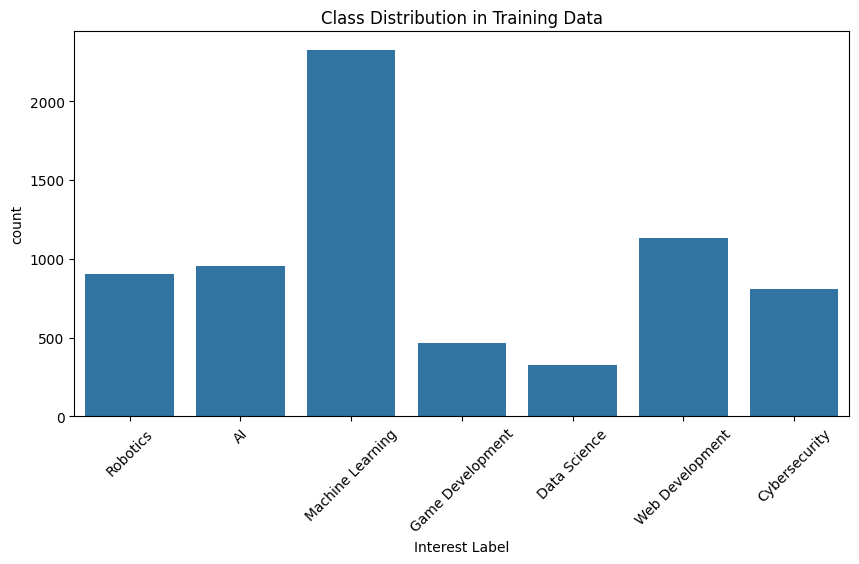

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.xticks(rotation=45)
plt.title("Class Distribution in Training Data")
plt.show()


Feature Importance Analysis

In [25]:
import numpy as np

# Get feature importance scores
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort by importance
sorted_indices = np.argsort(importances)[::-1]

# Print feature importance
print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Feature Importances:
Operating System: 0.1761
DSA: 0.1678
Data Analytics: 0.1664
Machine Learning: 0.1655
Frontend: 0.1632
Backend: 0.1610


Tune Hyperparameters

In [26]:
rf_model_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)


Tuned Random Forest Accuracy: 0.425345466801483


Now again run steps

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.39164138860802156


c:\Users\simran dhillon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.38860802157061003

Classification Report:
                   precision    recall  f1-score   support

              AI       0.28      0.12      0.17       409
   Cybersecurity       0.40      0.32      0.36       347
    Data Science       0.09      0.01      0.01       140
Game Development       0.19      0.04      0.07       200
Machine Learning       0.40      0.63      0.49       998
        Robotics       0.43      0.45      0.44       388
 Web Development       0.38      0.38      0.38       485

        accuracy                           0.39      2967
       macro avg       0.31      0.28      0.27      2967
    weighted avg       0.35      0.39      0.35      2967



Train & Evaluate XGBoost

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels (domains) into numbers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original labels
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_labels)
print("XGBoost Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_labels))


XGBoost Accuracy: 0.378159757330637

Classification Report:
                   precision    recall  f1-score   support

              AI       0.27      0.13      0.18       409
   Cybersecurity       0.38      0.31      0.34       347
    Data Science       0.07      0.01      0.02       140
Game Development       0.15      0.05      0.08       200
Machine Learning       0.40      0.58      0.47       998
        Robotics       0.41      0.50      0.45       388
 Web Development       0.38      0.36      0.37       485

        accuracy                           0.38      2967
       macro avg       0.29      0.28      0.27      2967
    weighted avg       0.34      0.38      0.35      2967



Analysis of Low Accuracy (35.65%)

Check Class Distribution Again (Imbalance Issue)

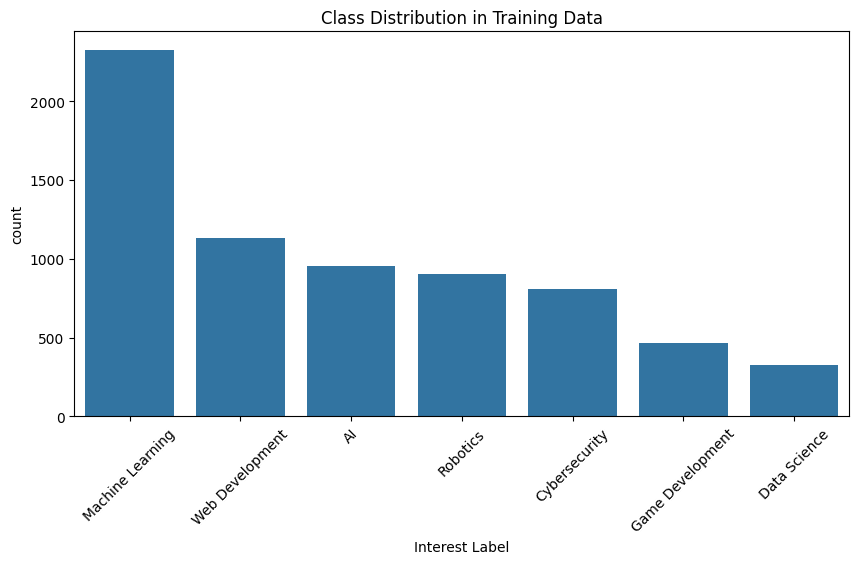

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, order=y_train.value_counts().index)
plt.xticks(rotation=45)
plt.title("Class Distribution in Training Data")
plt.show()

Feature Importance Analysis (Check Subject Impact)

In [32]:
import pandas as pd
import numpy as np

# Get feature importance from XGBoost
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Sort and display
sorted_indices = np.argsort(importances)[::-1]
print("\nFeature Importances (Most Important First):")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Feature Importances (Most Important First):
Operating System: 0.2059
DSA: 0.1751
Machine Learning: 0.1608
Data Analytics: 0.1577
Frontend: 0.1511
Backend: 0.1493


Try a Simpler Model (Support Vector Machine - SVM)

In [33]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train_encoded)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Decode labels
y_pred_svm_labels = label_encoder.inverse_transform(y_pred_svm)

# Evaluate
accuracy_svm = accuracy_score(y_test, y_pred_svm_labels)
print("SVM Accuracy:", accuracy_svm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_labels))

SVM Accuracy: 0.39332659251769464


c:\Users\simran dhillon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\simran dhillon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                   precision    recall  f1-score   support

              AI       0.00      0.00      0.00       409
   Cybersecurity       0.42      0.24      0.30       347
    Data Science       0.00      0.00      0.00       140
Game Development       0.00      0.00      0.00       200
Machine Learning       0.39      0.79      0.52       998
        Robotics       0.38      0.33      0.35       388
 Web Development       0.41      0.34      0.37       485

        accuracy                           0.39      2967
       macro avg       0.23      0.24      0.22      2967
    weighted avg       0.30      0.39      0.32      2967



c:\Users\simran dhillon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Steps to Improve Accuracy

Normalize Data (Scale Marks for Better Learning)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Hyperparameter Tuning (Find the Best Model Settings)

In [35]:
xgb_tuned = XGBClassifier(
    n_estimators=300, 
    max_depth=8, 
    learning_rate=0.05, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

xgb_tuned.fit(X_train_scaled, y_train_encoded)
y_pred_xgb_tuned = xgb_tuned.predict(X_test_scaled)

# Decode labels
y_pred_xgb_tuned_labels = label_encoder.inverse_transform(y_pred_xgb_tuned)

# Evaluate
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned_labels)
print("Tuned XGBoost Accuracy:", accuracy_xgb_tuned)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_tuned_labels))

KeyboardInterrupt: 

Check Class Imbalance & Use SMOTE (If Needed)

In [17]:
y_train.value_counts()

Interest Label
Cybersecurity       10092
AI                   9076
Data Science         6977
Machine Learning     6662
Web Development      4020
Game Development     2095
Robotics              706
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_encoded)

# Check new class distribution
import pandas as pd
y_train_balanced_series = pd.Series(y_train_balanced)
print("Balanced Class Distribution:\n", y_train_balanced_series.value_counts())

Balanced Class Distribution:
 0    10092
4    10092
1    10092
2    10092
6    10092
5    10092
3    10092
Name: count, dtype: int64


In [19]:
xgb_model_balanced = XGBClassifier(
    n_estimators=300, 
    max_depth=8, 
    learning_rate=0.05, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

xgb_model_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_xgb_balanced = xgb_model_balanced.predict(X_test_scaled)

# Decode labels
y_pred_xgb_balanced_labels = label_encoder.inverse_transform(y_pred_xgb_balanced)

# Evaluate
accuracy_xgb_balanced = accuracy_score(y_test, y_pred_xgb_balanced_labels)
print("XGBoost Accuracy After SMOTE:", accuracy_xgb_balanced)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_balanced_labels))


XGBoost Accuracy After SMOTE: 0.36156253154335316

Classification Report:
                   precision    recall  f1-score   support

              AI       0.41      0.31      0.35      2269
   Cybersecurity       0.42      0.34      0.38      2523
    Data Science       0.37      0.41      0.39      1744
Game Development       0.22      0.43      0.29       524
Machine Learning       0.31      0.22      0.26      1666
        Robotics       0.09      0.28      0.13       176
 Web Development       0.46      0.67      0.55      1005

        accuracy                           0.36      9907
       macro avg       0.33      0.38      0.33      9907
    weighted avg       0.38      0.36      0.36      9907

